In [ ]:
# https://drive.google.com/file/d/1DlJY6ySqSZZEUgiOqL2uCkKagt5bP3MN/view?usp=share_link
!gdown --id 1DlJY6ySqSZZEUgiOqL2uCkKagt5bP3MN

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DlJY6ySqSZZEUgiOqL2uCkKagt5bP3MN
To: /content/poem_dataset.zip
100% 20.3k/20.3k [00:00<00:00, 62.1MB/s]


In [ ]:
!unzip './poem_dataset.zip'

Archive:  ./poem_dataset.zip
  inflating: poem_dataset.csv        


## **1. Import các thư viện cần thiết**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

RANDOM_SEED = 1
tf.random.set_seed(RANDOM_SEED)

## **2. Chuẩn bị dữ liệu**

In [ ]:
def text_normalize(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r'[^\w\s\n]', '', text)
    text = text.replace('\n\n', '\n')
    text = '\n'.join(['<start> ' + line + ' <end>' for line in text.split('\n') if line != '' and len(line.split()) == 5])

    return text

In [ ]:
BATCH_SIZE = 32
MAX_SEQ_LEN = 7
VOCAB_SIZE = 5000

In [ ]:
DATASET_PATH = './poem_dataset.csv'

df = pd.read_csv(DATASET_PATH, index_col=0)
df['content'] = df['content'].apply(lambda p: text_normalize(p))
corpus = df['content'].to_numpy()

X = []
y = []
for idx, row in df.iterrows():
    lines = row['content'].split('\n')
    lines = [line for line in lines if line != '']
    for idx in range(0, len(lines) - 1):
        input_sentence = lines[idx]
        output_sentence = lines[idx+1]

        X.append(input_sentence)
        y.append(output_sentence)

In [ ]:
df['content']

0     <start> cái làm ta hạnh phúc <end>\n<start> th...
1     <start> chiều vừa xốp trên tay <end>\n<start> ...
2     <start> dưới giàn hoa thiên lý <end>\n<start> ...
3     <start> đến nhiều nơi để đến <end>\n<start> về...
4     <start> đừng bao giờ dại dột <end>\n<start> đe...
                            ...                        
85    <start> đời anh hăm hai tuổi <end>\n<start> ch...
86    <start> anh đi công tác về <end>\n<start> em c...
87    <start> anh đi qua đời em <end>\n<start> như c...
88    <start> anh nằm ngoài sự thực <end>\n<start> e...
89                                                     
Name: content, Length: 90, dtype: object

In [ ]:
for idx in range(len(X)):
    print(f'Input: {X[idx]} => {y[idx]}')

Input: <start> cái làm ta hạnh phúc <end> => <start> thực ra cũng chẳng nhiều <end>
Input: <start> thực ra cũng chẳng nhiều <end> => <start> chỉ cần có ai đó <end>
Input: <start> chỉ cần có ai đó <end> => <start> để ta thầm thương yêu <end>
Input: <start> để ta thầm thương yêu <end> => <start> rồi thêm chút công việc <end>
Input: <start> rồi thêm chút công việc <end> => <start> cho ta làm hàng ngày <end>
Input: <start> cho ta làm hàng ngày <end> => <start> cuối cùng chút mơ mộng <end>
Input: <start> cuối cùng chút mơ mộng <end> => <start> để đưa ta lên mây <end>
Input: <start> chiều vừa xốp trên tay <end> => <start> chợt nghe thoáng ong bay <end>
Input: <start> chợt nghe thoáng ong bay <end> => <start> có ai vừa chết nhỉ <end>
Input: <start> có ai vừa chết nhỉ <end> => <start> mây thắt tang trăng gầy <end>
Input: <start> mây thắt tang trăng gầy <end> => <start> ớt đỏ sao cứ đỏ <end>
Input: <start> ớt đỏ sao cứ đỏ <end> => <start> táo chín cho thật vàng <end>
Input: <start> táo chín cho

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='', oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

VOCAB_SIZE = len(tokenizer.word_index) + 1


Input: <start> vết trầm kha tim đỏ <end> => <start> rên siết khuya thì thầm <end>
Input: <start> rên siết khuya thì thầm <end> => <start> biết buồn là mãi đó <end>
Input: <start> biết buồn là mãi đó <end> => <start> em đừng phai má hồng <end>
Input: <start> em đừng phai má hồng <end> => <start> một mối tình nho nhỏ <end>
Input: <start> một mối tình nho nhỏ <end> => <start> anh bốn mùa lập đông <end>
Input: <start> ai bảo anh bù nhìn <end> => <start> là đồ vô tích sự <end>
Input: <start> là đồ vô tích sự <end> => <start> em không tin không tin <end>
Input: <start> em không tin không tin <end> => <start> còn thương anh nữa chứ <end>
Input: <start> còn thương anh nữa chứ <end> => <start> cánh đồng dù mưa nắng <end>
Input: <start> cánh đồng dù mưa nắng <end> => <start> ngày đêm anh đứng canh <end>
Input: <start> ngày đêm anh đứng canh <end> => <start> lúa an tâm vào hạt <end>
Input: <start> lúa an tâm vào hạt <end> => <start> không sợ chim chuột càn <end>
Input: <start> không sợ chim chuộ

In [ ]:
def prepare_output_sequences(y_sequences):
    y_inputs = pad_sequences([y_seq[:-1] for y_seq in y_sequences], maxlen=MAX_SEQ_LEN, truncating='pre', padding='post')
    y_outputs = pad_sequences([y_seq[1:] for y_seq in y_sequences], maxlen=MAX_SEQ_LEN, truncating='pre', padding='post')

    return y_inputs, y_outputs

X_sequences = tokenizer.texts_to_sequences(X)
X_padded_sequences = pad_sequences(X_sequences, maxlen=MAX_SEQ_LEN, truncating='pre', padding='post')

y_sequences = tokenizer.texts_to_sequences(y)
y_inputs, y_outputs = prepare_output_sequences(y_sequences)

In [ ]:
n_samples = len(X_padded_sequences)
print(n_samples)

1028


In [ ]:
train_len = int(n_samples * 0.7)
val_len = int(n_samples * 0.2)
test_len = n_samples - train_len - val_len

# Shuffle
np.random.seed(1)
idxs = np.arange(n_samples)
idxs = np.random.permutation(idxs)

X_padded_sequences = X_padded_sequences[idxs]
y_inputs = y_inputs[idxs]
y_outputs = y_outputs[idxs]

# Split the data into train, validation, and test sets
X_train_seq, y_train_input, y_train_output = X_padded_sequences[:train_len], y_inputs[:train_len], y_outputs[:train_len]
X_val_seq, y_val_input, y_val_output = X_padded_sequences[train_len:train_len+val_len], y_inputs[train_len:train_len+val_len], y_outputs[train_len:train_len+val_len]
X_test_seq, y_test_input, y_test_output = X_padded_sequences[train_len+val_len:], y_inputs[train_len+val_len:], y_outputs[train_len+val_len:]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(((X_train_seq, y_train_input), y_train_output)).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices(((X_val_seq, y_val_input), y_val_output)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices(((X_test_seq, y_test_input), y_test_output)).batch(BATCH_SIZE)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **3. Xây dựng mô hình**

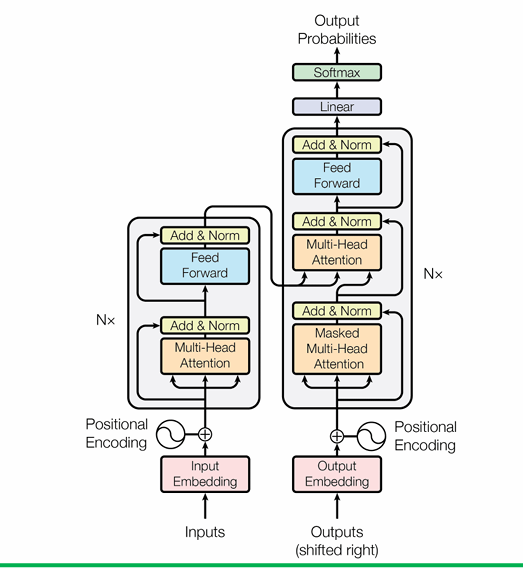

### 3.1. Positional Encoding Layer

In [ ]:
def positional_encoding(length, depth):
    depth = depth/2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1)

    return tf.cast(pos_encoding, dtype=tf.float32)

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def compute_mask(self, *args, **kwargs):
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)
        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

### 3.2. Self-attention Layer

In [ ]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

### 3.3. Cross-attention Layer

In [ ]:
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

### 3.4. Global Self-attention Layer

In [ ]:
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

### 3.5. Causal Self-attention Layer

In [ ]:
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask = True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

### 3.6. Feed-forward Network

In [ ]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model),
        tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x)
        return x

### 3.7. Encoder Layer

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

### 3.8. Transformer Encoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
                dff, vocab_size, dropout_rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(
            vocab_size=vocab_size, d_model=d_model)

        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                        num_heads=num_heads,
                        dff=dff,
                        dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.

### 3.9. Decoder Layer

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
                *,
                d_model,
                num_heads,
                dff,
                dropout_rate=0.1):
        super(DecoderLayer, self).__init__()

        self.causal_self_attention = CausalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.cross_attention = CrossAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)

        # Cache the last attention scores for plotting later
        self.last_attn_scores = self.cross_attention.last_attn_scores

        x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
        return x

### 3.10. Transformer Decoder

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
                dropout_rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                                d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layers = [
            DecoderLayer(d_model=d_model, num_heads=num_heads,
                        dff=dff, dropout_rate=dropout_rate)
            for _ in range(num_layers)]

        self.last_attn_scores = None

    def call(self, x, context):
        # `x` is token-IDs shape (batch, target_seq_len)
        x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

        x = self.dropout(x)

        for i in range(self.num_layers):
            x  = self.dec_layers[i](x, context)

        self.last_attn_scores = self.dec_layers[-1].last_attn_scores

        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

### 3.11. Transformer Model

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
                vocab_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                            num_heads=num_heads, dff=dff,
                            vocab_size=vocab_size,
                            dropout_rate=dropout_rate)

        self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                            num_heads=num_heads, dff=dff,
                            vocab_size=vocab_size,
                            dropout_rate=dropout_rate)

        self.final_layer = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs

        context = self.encoder(context)  # (batch_size, context_len, d_model)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits

In [ ]:
N_LAYERS = 4
D_MODEL = 128
D_FF = 512
N_HEADS = 8
DROPOUT_RATE = 0.2

In [ ]:
transformer = Transformer(
    num_layers=N_LAYERS,
    d_model=D_MODEL,
    num_heads=N_HEADS,
    dff=D_FF,
    vocab_size=VOCAB_SIZE,
    dropout_rate=DROPOUT_RATE
)

In [ ]:
batches = train_ds.take(2)
for batch in batches:
    X_try, y_try = batch[0], batch[1]
    break

In [ ]:
output = transformer(X_try)

In [ ]:
output.shape

TensorShape([32, 7, 1471])

In [ ]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  2827136   
                                                                 
 decoder (Decoder)           multiple                  4938112   
                                                                 
 dense_16 (Dense)            multiple                  189759    
                                                                 
Total params: 7955007 (30.35 MB)
Trainable params: 7955007 (30.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **4. Cấu hình mô hình**

In [ ]:
EPOCHS = 50

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-9
)

In [ ]:
def masked_loss(label, pred):
    mask = label != 0
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)

    return loss


def masked_accuracy(label, pred):
    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0

    match = match & mask

    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    return tf.reduce_sum(match)/tf.reduce_sum(mask)

def compute_perplexity(logits, targets):
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

    loss = loss_fn(targets, logits)

    perplexity = np.exp(np.mean(loss))

    return perplexity


def compute_bleu(predicted, targets):
    predicted_strings = []
    for seq in predicted:
        seq = np.argmax(seq, axis=1)
        string_seq = " ".join([tokenizer.sequences_to_texts([[token]])[0] for token in seq if token != 0])
        predicted_strings.append(string_seq)
    target_strings = []
    for seq in targets:
        seq = seq.numpy().tolist()
        string_seq = " ".join([tokenizer.sequences_to_texts([[token]])[0] for token in seq if token != 0])
        target_strings.append([string_seq])

    bleu_score = corpus_bleu(target_strings, predicted_strings)

    return bleu_score

In [ ]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy]
)

## **5. Thực hiện huấn luyện**

In [ ]:
history = transformer.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds
)

Epoch 1/50
23/23 [==============================] - 37s 287ms/step - loss: 7.4186 - masked_accuracy: 2.2645e-04 - val_loss: 7.2810 - val_masked_accuracy: 0.0000e+00
Epoch 2/50
23/23 [==============================] - 2s 81ms/step - loss: 7.1282 - masked_accuracy: 0.0892 - val_loss: 6.8941 - val_masked_accuracy: 0.1667
Epoch 3/50
23/23 [==============================] - 1s 49ms/step - loss: 6.8160 - masked_accuracy: 0.1667 - val_loss: 6.6829 - val_masked_accuracy: 0.1667
Epoch 4/50
23/23 [==============================] - 1s 50ms/step - loss: 6.6486 - masked_accuracy: 0.1667 - val_loss: 6.5941 - val_masked_accuracy: 0.1667
Epoch 5/50
23/23 [==============================] - 1s 51ms/step - loss: 6.5652 - masked_accuracy: 0.1667 - val_loss: 6.5318 - val_masked_accuracy: 0.1667
Epoch 6/50
23/23 [==============================] - 1s 51ms/step - loss: 6.4914 - masked_accuracy: 0.1667 - val_loss: 6.4653 - val_masked_accuracy: 0.1667
Epoch 7/50
23/23 [==============================] - 1s 51ms/

## **6. Đánh giá và trực quan hóa**

In [ ]:
# Đánh giá mô hình trên tập test
test_evaluation = transformer.evaluate(test_ds)

4/4 [==============================] - 0s 19ms/step - loss: 6.3356 - masked_accuracy: 0.1875


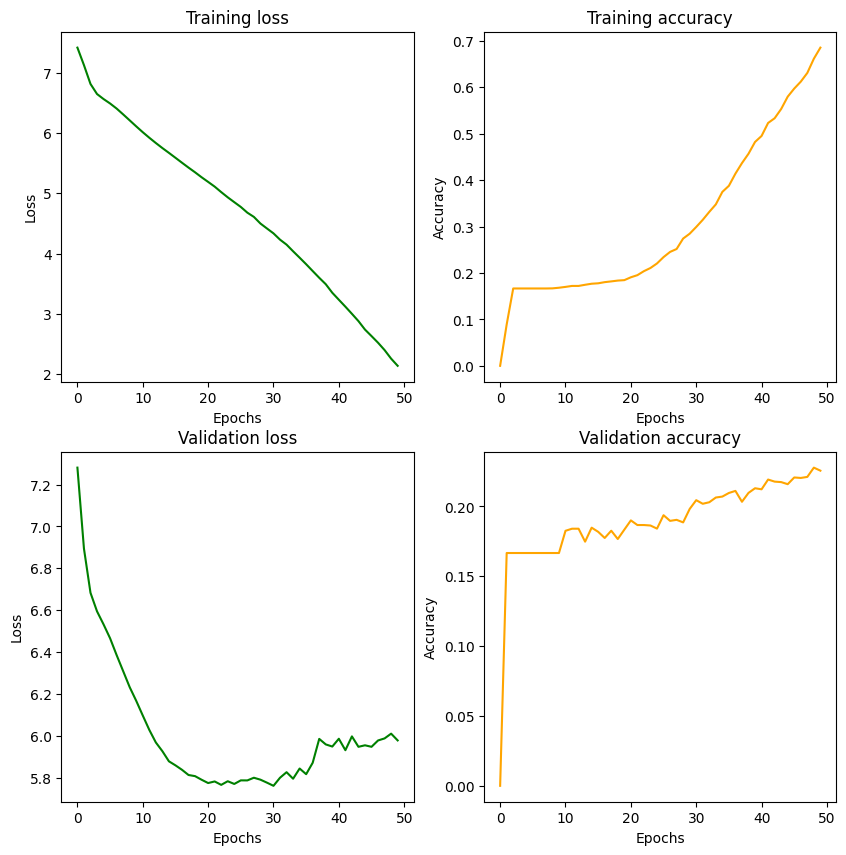

In [ ]:
# Đọc các kết quả huấn luyện mô hình qua từng epoch
train_loss, train_acc = history.history['loss'], history.history['masked_accuracy'] # Đọc thông tin loss, acc trên tập train
val_loss, val_acc = history.history['val_loss'], history.history['val_masked_accuracy'] # Đọc thông tin loss, acc trên tập val

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung ảnh

plt.subplot(2, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='green') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 2) # Khởi tạo khung ảnh cho training acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Training accuracy') # Hiển thị title của khung ảnh hiện tại là 'Training accuracy'
plt.plot(train_acc, color='orange') # Vẽ đường giá trị accuracy trên tập train qua từng epoch (đường vẽ màu cam)

plt.subplot(2, 2, 3) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='green') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 4) # Khởi tạo khung ảnh cho val acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Validation accuracy') # Hiển thị title của khung ảnh hiện tại là 'Validation accuracy'
plt.plot(val_acc, color='orange') # Vẽ đường giá trị accuracy trên tập val qua từng epoch (đường vẽ màu cam)

plt.show() # Hiển thị 4 khung ảnh nhỏ

In [ ]:
perplexities = []
bleu_scores = []
for sample in test_ds:
    X_try, y_try = sample
    y_pred = transformer(X_try)
    batch_perplexity = compute_perplexity(y_pred, y_try)
    batch_bleu_score = compute_bleu(y_pred, y_try)

    perplexities.append(batch_perplexity)
    bleu_scores.append(batch_bleu_score)

    # print(f'Perplexity: {batch_perplexity}')
    # print(f'BLEU score: {batch_bleu_score}')

print(f'Perplexity: {sum(perplexities) / len(perplexities)}')
print(f'BLEU score: {sum(bleu_scores) / len(bleu_scores)}')

Perplexity: 1940.5328063964844
BLEU score: 0.2325874462737287


## **7. Inference**

In [ ]:
def generate_text(
    generator_model,
    tokenizer,
    input_string
    ):

    encoder_input_string = text_normalize(input_string)
    encoder_input_sequence = tokenizer.texts_to_sequences([encoder_input_string])
    encoder_input_padded_sequence = pad_sequences(encoder_input_sequence, maxlen=MAX_SEQ_LEN, truncating='pre', padding='post')[0]
    encoder_input_padded_sequence = np.expand_dims(encoder_input_padded_sequence, axis=0)

    decoder_input_string = '<start>'
    decoder_input_sequence = tokenizer.texts_to_sequences([decoder_input_string])
    decoder_input_padded_sequence = pad_sequences(decoder_input_sequence, maxlen=MAX_SEQ_LEN, truncating='pre', padding='post')[0]
    start = decoder_input_padded_sequence[0][tf.newaxis]
    end = decoder_input_padded_sequence[1][tf.newaxis]
    decoder_input_padded_sequence = np.expand_dims(decoder_input_padded_sequence, axis=0)

    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(MAX_SEQ_LEN):
        output = tf.transpose(output_array.stack())
        predictions = generator_model((encoder_input_padded_sequence, output), training=False)

        # Select the last token from the `seq_len` dimension.
        predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

        predicted_id = tf.argmax(predictions, axis=-1)

        # Concatenate the `predicted_id` to the output which is given to the
        # decoder as its input.
        output_array = output_array.write(i+1, predicted_id[0])

        if predicted_id == end:
            break

    output = tf.transpose(output_array.stack())
    output_tokens = output.numpy()
    # The output shape is `(1, tokens)`.
    text = tokenizer.sequences_to_texts(output_tokens)[0]  # Shape: `()`.


    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    generator_model([decoder_input_padded_sequence, output[:, :-1]], training=False)
    attention_weights = generator_model.decoder.last_attn_scores

    return text, output_tokens, attention_weights

In [ ]:
def infer(n_sentences, results):
  for idx in range(n_sentences + 1):
    input_str = results[idx]
    text, output_tokens, attention_weights = generate_text(
        transformer,
        tokenizer,
        input_str
    )
    results.append(text.replace('<start>', '').replace('<end>', ''))

  print('\n'.join(results))

In [ ]:
results = ['đời này còn lại gì']
infer(5, results)

đời này còn lại gì
 để nắng về xôn xao  
 chỉ cần có anh lại  
 cây cổ thụ bóng tối  
 vua đi rừng núi lại  
 nơi có cây cổ thụ  
 vua đi rồi em đi  


In [ ]:
results = ['Em giờ đang ở đâu?']
infer(5, results)

Em giờ đang ở đâu?
 trong gió trên buồn phiền  
 trong khi trong mưa mùa  
 trời mưa nắng về lại  
 một ngày trời mưa nắng  
 sao mùa đông rừng núi  
 đời mùa đông vô cùng  


In [ ]:
results = ['Gió ơi là gió ơi']
infer(5, results)

Gió ơi là gió ơi
 em chỉ cần có anh  
 cây cổ thụ bạc tóc  
 không những nhà cùng ra  
 một cây cổ thụ   
 một trong mưa lên mình  
 một ngày trời mưa nắng  
